In [226]:
!pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [227]:
import pandas as pd
import matplotlib.pyplot as plt
print(pd.__version__)

2.3.2


In [228]:
df = pd.read_csv("E:/DATA ANALYS/webeet project/day 2 webeet/high-school-directory.csv")
#df.head()


In [229]:

df.columns = (               # assign cleaned column names back to the DataFrame
    df.columns
    .str.lower()             # make all column names lowercase (e.g., 'School Name' -> 'school name')
    .str.strip()             # remove leading/trailing whitespace
    .str.replace(' ', '_')   # replace spaces with underscores (e.g., 'school name' -> 'school_name')
    .str.replace('[^a-z0-9_]', '', regex=True)  # remove special characters, keep only a–z, 0–9, and underscores
)
#df.head()

In [230]:
# Filter the DataFrame to include only schools located in Brooklyn
brooklyn_schools = df[df['borough'].str.lower() == 'brooklyn']  

# Show the shape (rows, columns) of the filtered DataFrame
brooklyn_schools.shape  


(121, 69)

In [231]:
df['total_students'] = pd.to_numeric(df['total_students'], errors='coerce')   # convert column to numeric, handle errors as NaN
avg_students = df.groupby('borough')['total_students'].mean().round(0).astype(int)  # group by borough, calculate average students, round and convert to int
avg_students   # show result



borough
Bronx             490
Brooklyn          699
Manhattan         590
Queens           1047
Staten Island    1848
Name: total_students, dtype: int64

In [232]:
brooklyn_unique = brooklyn_schools['dbn'].nunique()   # count unique school IDs (dbn) in Brooklyn
print("Number of unique schools in Brooklyn:", brooklyn_unique)   # print the result



Number of unique schools in Brooklyn: 121


In [233]:
def grade_to_int(x):
    try:
        return int(x.replace("K","0"))   # convert 'K' to 0 if grade is Kindergarten
    except:
        try:
            return int(x)                # convert grade values to integer
        except:
            return None                  # return None if conversion fails

# apply conversion to grade columns
df['grade_span_min'] = df['grade_span_min'].astype(str).apply(grade_to_int)
df['grade_span_max'] = df['grade_span_max'].astype(str).apply(grade_to_int)

# filter Brooklyn schools that include grade 9 in their span
brooklyn_with_grade9 = brooklyn_schools[
    (brooklyn_schools['grade_span_min'] <= 9) &   # minimum grade <= 9
    (brooklyn_schools['grade_span_max'] >= 9)     # maximum grade >= 9
]['dbn'].nunique()                                # count unique schools (by dbn)

print("Number of Brooklyn schools with Grade 9 entry:", brooklyn_with_grade9)


Number of Brooklyn schools with Grade 9 entry: 121


In [234]:
schools_per_borough = df.groupby('borough')['dbn'].nunique()  # group by borough and count unique schools (dbn)



In [235]:
df['total_students'] = pd.to_numeric(df['total_students'], errors='coerce')  # convert student numbers to numeric, invalid values become NaN
avg_students = df.groupby('borough')['total_students'].mean()                # calculate average students per borough



In [236]:
summary_grade = df.groupby('borough')['grade_span_max'].describe()[['count', 'mean', 'min', 'max']]
summary_grade




,count,mean,min,max
borough,,,,
Bronx,118.0,11.906780,9.0,12.0
Brooklyn,121.0,11.933884,9.0,12.0
Manhattan,106.0,11.877358,9.0,12.0
Queens,80.0,11.825000,10.0,12.0
Staten Island,10.0,12.000000,12.0,12.0


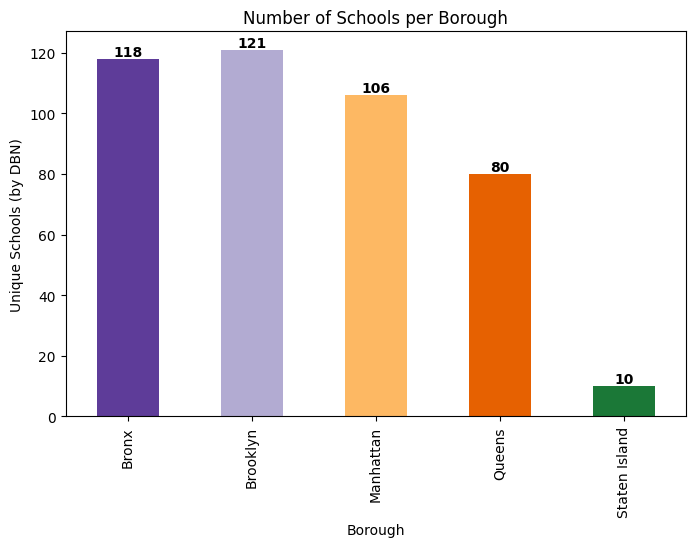

In [237]:
ax = schools_per_borough.plot(kind='bar', figsize=(8,5), color=['#5e3c99','#b2abd2','#fdb863','#e66101','#1b7837'])
for i, v in enumerate(schools_per_borough):
    ax.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.title("Number of Schools per Borough")
plt.ylabel("Unique Schools (by DBN)")
plt.xlabel("Borough")
plt.show()




Q1. How many total schools are in Brooklyn?
Answer: 121 unique schools (identified by the dbn column).

Q2. How many schools in Brooklyn offer Grade 9 entry?
Answer: 121 schools.
Method: Applied the range condition grade_span_min <= 9 <= grade_span_max. Since every Brooklyn school in the dataset covers Grade 9, the result is equal to the total number of schools in Brooklyn.

Q3. Count of schools per borough (unique by dbn):

Brooklyn: 121

Bronx: 118

Manhattan: 106

Queens: 80

Staten Island: 10

Q4. Average number of students per borough:

Bronx: 490

Brooklyn: 699

Manhattan: 590

Queens: 1047

Staten Island: 1848

Q5. Summary of grade_span_max grouped by borough (count, mean, min, max):

Borough       	Count	Mean	Min	Max
Bronx	         118	11.91	9	12
Brooklyn	     121	11.93	9	12
Manhattan	     106	11.88	9	12
Queens	          80	11.83	10	12
Staten Island	  10	12.00	12	12



Key Insights:

Brooklyn has the largest number of schools, followed closely by the Bronx.

Staten Island has the fewest schools, but its schools have the largest average student enrollment.

Queens schools also stand out with high average enrollment compared to Manhattan and Brooklyn.